<b> TODO: P2.1.1, P2.1.2, P2.1.3, P2.1.4, P2.2.3. </b>

Nota: odeint é usada para equações diferenciais de primeira ordem

#### <b> Integrals </b>

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

<b> 2.1.1 </b>

In [ ]:
# Variables
a = -2
b = 1
n = [10, 100, 1000]

# Function
def f(x): 
    return (1 + x**2) / (1 + np.exp(x))

# Integral of f
x = np.linspace(a, b, n[2]) # evenly spaced points, change index of n between 0 and 2
y = f(x)

simpson_integral = sp.integrate.simpson(y, x)

In [5]:
print(f"Integral of f(x) in the interval [{a}, {b}] with {n[2]} points: {simpson_integral}")

Integral of f(x) in the interval [-2, 1] with 1000 points: 4.0826729930693215


#### <b> First Order Differential Equations and Coupled F-ODE </b>

In [6]:
def dvdt(t,v):
    return 3*v**2 - 5
v0 = 0 # initial condition

##### <b> Solvers </b>

* <b>odeint</b>: Pretty classic, uses a solver called Isoda FORTRAN library odepack

* <b>solve_ivp</b>: More customizable, can choose from a list of possible solvers

In [7]:
t = np.linspace(0, 1, 100)

In [8]:
t

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [29]:
sol_m1 = odeint(dvdt, y0=v0, t=t, tfirst=True)
sol_m2 = solve_ivp(dvdt, t_span=(0,max(t)), y0=[v0], t_eval=t)

In [30]:
#v_sol_m1
v_sol_m1 = sol_m1.T[0]

In [31]:
v_sol_m2 = sol_m2.y[0]

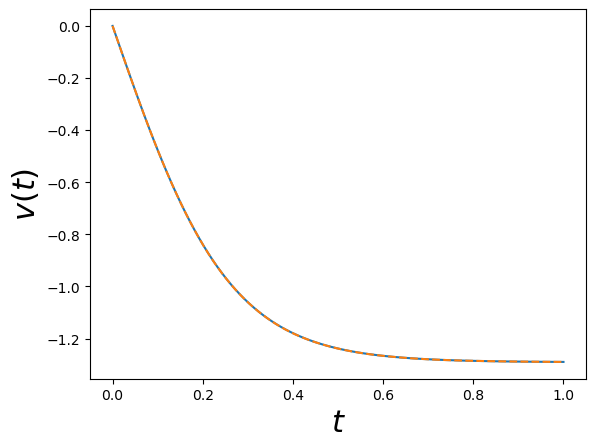

In [32]:
plt.plot(t, v_sol_m1)
plt.plot(t, v_sol_m2, '--')
plt.ylabel('$v(t)$', fontsize=22)
plt.xlabel('$t$', fontsize=22)
plt.show()

As we can see, since the graphs overlap at all points <b> t </b> both solvers (odeint and solve_ivp) return the same results. 